# Exercise: Polynomial Regression and KNN


A) Use the Auto dataset, find the $R^2$ score of a linear regression model that predicts the miles per gallon (mpg) from the horsepower.

Hints:

    Create model object using: model=LinearRegression()

    Fit the model: fitted_model=model.fit(X_train,Y_train)

    Find the R squared metric using: fitted_model.score(X_test,Y_test)


R squared of linear regression is: 0.62176588114


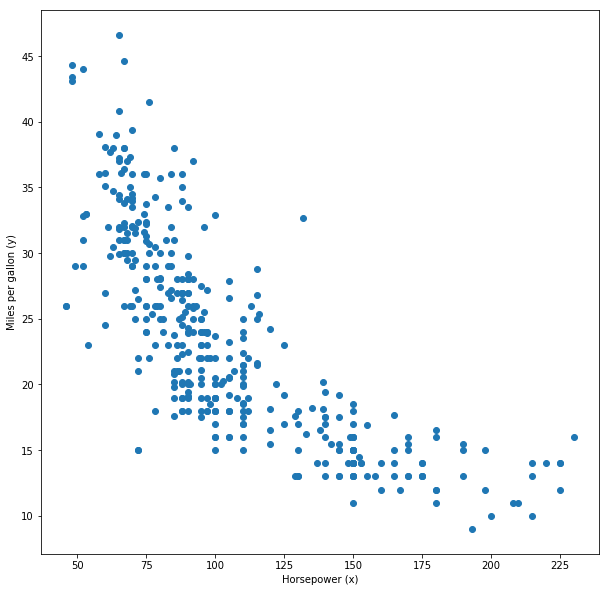

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy 

AutoData=read_csv('Auto_modify.csv') # read the data

X_auto_hp=AutoData.horsepower.values.reshape(-1,1) # define features: horsepower 
Y_auto_mpg=AutoData.mpg.values.reshape(-1,1) # define label: miles per gallon

#ploting the data points
plt.figure(figsize=(10,10))
plt.scatter(X_auto_hp, Y_auto_mpg, marker= 'o')
plt.xlabel('Horsepower (x)')
plt.ylabel('Miles per gallon (y)')

#Split to train and test
X_train, X_test, Y_train, Y_test= train_test_split(X_auto_hp, Y_auto_mpg, random_state= 0)

# continue your code here
model=LinearRegression()
fitted_model=model.fit(X_train,Y_train)
fitted_model2=fitted_model.score(X_test,Y_test)
print('R squared of linear regression is:',fitted_model2)

    



B) Use polynomial regression to include both the horsepower feature and $(horsepower)^2$ in the regression model. Find the $R^2$ metric. 

Hint: You can use [numpy.concatenate](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.concatenate.html). For example to add to an array U a column vector $W^2$, we can use X=np.concatenate((U,W**2),axis=1)


C) Optional: repeat (B) increase the degree of the polynomial to 3,then 4, then 5 and check the accuracy in each case.


In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt;
from sklearn import preprocessing;
from pandas import read_csv
from sklearn.linear_model import LinearRegression;
from sklearn.model_selection import train_test_split
import numpy as np
AutoData=read_csv('Auto_modify.csv')
X_auto_hp=AutoData.horsepower.values.reshape(-1,1)
Y_auto_mpg=AutoData.mpg.values.reshape(-1,1)
Automodel1=LinearRegression()
X=X_auto_hp 
X=np.concatenate((X,X_auto_hp**2),axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_auto_mpg,random_state=1)
scaler=preprocessing.MinMaxScaler().fit(X_train);
X_train_transformed=scaler.transform(X_train)
X_test_transformed=scaler.transform(X_test)
Autofittedmodel1=Automodel1.fit(X_train_transformed,Y_train)
R2AutoHPPolyscale=Autofittedmodel1.score(X_test_transformed,Y_test)
print('R^2 of linear regression with scaling is:',R2AutoHPPolyscale,'for polynomial of degree',2)
    

R^2 of linear regression with scaling is: 0.693284770601 for polynomial of degree 2


C:\Users\rvais\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [6]:
# write code here
%matplotlib inline 
import matplotlib.pyplot as plt;
from sklearn import preprocessing;
from pandas import read_csv
from sklearn.linear_model import LinearRegression;
from sklearn.model_selection import train_test_split
import numpy as np
AutoData=read_csv('Auto_modify.csv')
X_auto_hp=AutoData.horsepower.values.reshape(-1,1)
Y_auto_mpg=AutoData.mpg.values.reshape(-1,1)
Automodel1=LinearRegression()
X=X_auto_hp 
for pow in[1,2,3,4,5]:
    if pow>1:
        X=np.concatenate((X,X_auto_hp**pow),axis=1)
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y_auto_mpg,random_state=1)
    scaler=preprocessing.MinMaxScaler().fit(X_train);
    X_train_transformed=scaler.transform(X_train)
    X_test_transformed=scaler.transform(X_test)

    Autofittedmodel1=Automodel1.fit(X_train_transformed,Y_train)
    R2AutoHPPolyscale=Autofittedmodel1.score(X_test_transformed,Y_test)
    print('R^2 of linear regression with scaling is:',R2AutoHPPolyscale,'for polynomial of degree',pow)
    


R^2 of linear regression with scaling is: 0.596002237883 for polynomial of degree 1
R^2 of linear regression with scaling is: 0.693284770601 for polynomial of degree 2
R^2 of linear regression with scaling is: 0.693234080261 for polynomial of degree 3
R^2 of linear regression with scaling is: 0.69517521054 for polynomial of degree 4
R^2 of linear regression with scaling is: 0.695897849881 for polynomial of degree 5


C:\Users\rvais\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


In [24]:
#Problem: B
from pandas import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
AutoData=read_csv('Auto_modify.csv')
import numpy as np
import pandas as pd
hp=AutoData.horsepower
hp2=hp*hp
hp=hp.tolist()
hp2=hp2.tolist()
mpg=AutoData.mpg.tolist()
xdf = pd.DataFrame({'horsepower': hp, 'horsepower2': hp2, 'mpg':mpg})
X = xdf[['horsepower', 'horsepower2']].values
Y = xdf.mpg
#print(X)
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)
linreg= LinearRegression().fit(X_train, Y_train)
R2 = linreg.score(X_test,Y_test)
print(R2)

0.727103150464


D) Use KNN regression to predict the miles per gallon(mpg) with K=7, and find $R^2$ metric in the following cases 

- One feature: Horsepower only

- Two features: horsepower and (horsepower)2 

Hint: 

    Create KNN regression object using neighbors.KNeighborsRegressor:

    knnRegression = neighbors.KNeighborsRegressor(n_neighbors=7)

    Use the .fit and .score methods as before

E) COMMENT on your results: which model performs better? How does performance change when adding the quadratic feature?


In [14]:
from sklearn import neighbors
X_auto_hp=AutoData.horsepower.values.reshape(-1,1) # define features: horsepower 
Y_auto_mpg=AutoData.mpg.values.reshape(-1,1)
X_train, X_test, Y_train, Y_test= train_test_split(X_auto_hp, Y_auto_mpg, random_state= 0)
##X_train1, X_test1, Y_train1, Y_test1= train_test_split(X, Y_auto_mpg, random_state= 0)
knn_model = neighbors.KNeighborsRegressor(n_neighbors =7)
knn_model.fit(X_train, Y_train)
KNNfeature=knn_model.score(X_test, Y_test) 
print("The score for KNN model with one feature horsepower is ",KNNfeature)


The score for KNN model with one feature horsepower is  0.667477744171


In [20]:
from sklearn import neighbors
X = np.concatenate((X_auto_hp,X_auto_hp**2),axis=1)
X_train, X_test, Y_train, Y_test= train_test_split(X, Y_auto_mpg, random_state= 0)
knn_model = neighbors.KNeighborsRegressor(n_neighbors =7)
knn_model.fit(X_train, Y_train)
KNNfeature=knn_model.score(X_test, Y_test) 
print("The score for KNN model with one feature horsepower is ",KNNfeature)

The score for KNN model with one feature horsepower is  0.670108404882


In [ ]:
##larger values of K provide a smoother and less variable fit
##Horsepower of KNN is better than linear regression model
##When non-linear terms are added ,Linear regression performs better
## Adding a quadratic feature to linear regression model improves the performance
